In [24]:
using CSV
using DataFrames
using Plots
using StatsPlots

In [25]:
threads_df = CSV.read("threads-julia-pp-30TeV.csv", DataFrame)

Row,Threads,N2Plain,N2Tiled
,Int64,Float64,Float64
1,1,1463.3,322.101
2,2,851.367,182.607
3,3,608.198,121.284
4,4,441.058,94.0212
5,5,425.281,87.0321
6,6,300.348,66.4067
7,7,289.356,64.5567
8,8,263.204,63.6158
9,9,248.82,60.6796


In [26]:
select!(threads_df, :, [:N2Plain, :Threads] => ByRow((ti, th) -> threads_df[1, :N2Plain] / ti) => :N2Plain_speedup)

Row,Threads,N2Plain,N2Tiled,N2Plain_speedup
,Int64,Float64,Float64,Float64
1,1,1463.3,322.101,1.0
2,2,851.367,182.607,1.71877
3,3,608.198,121.284,2.40596
4,4,441.058,94.0212,3.3177
5,5,425.281,87.0321,3.44078
6,6,300.348,66.4067,4.87202
7,7,289.356,64.5567,5.05709
8,8,263.204,63.6158,5.55957
9,9,248.82,60.6796,5.88096


In [27]:
select!(threads_df, :, [:N2Tiled, :Threads] => ByRow((ti, th) -> threads_df[1, :N2Tiled] / ti) => :N2Tiled_speedup)

Row,Threads,N2Plain,N2Tiled,N2Plain_speedup,N2Tiled_speedup
,Int64,Float64,Float64,Float64,Float64
1,1,1463.3,322.101,1.0,1.0
2,2,851.367,182.607,1.71877,1.7639
3,3,608.198,121.284,2.40596,2.65576
4,4,441.058,94.0212,3.3177,3.42583
5,5,425.281,87.0321,3.44078,3.70094
6,6,300.348,66.4067,4.87202,4.85043
7,7,289.356,64.5567,5.05709,4.98943
8,8,263.204,63.6158,5.55957,5.06322
9,9,248.82,60.6796,5.88096,5.30823


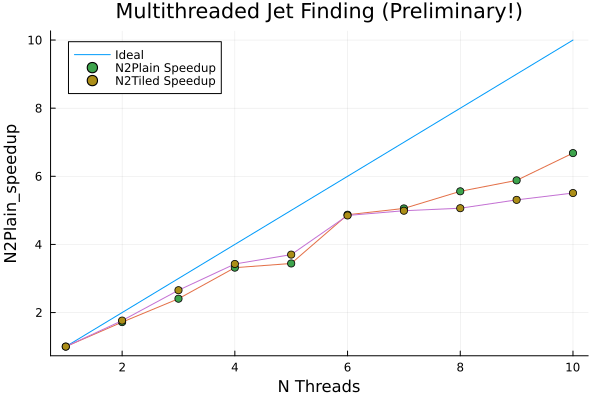

In [28]:
@df threads_df plot(:Threads, :Threads, label="Ideal", xlabel="N Threads", ylabel="N2Plain_speedup", title="Multithreaded Jet Finding (Preliminary!)")
@df threads_df plot!(:Threads, :N2Plain_speedup, label="")
@df threads_df scatter!(:Threads, :N2Plain_speedup, label="N2Plain Speedup")
@df threads_df plot!(:Threads, :N2Tiled_speedup, label="")
@df threads_df scatter!(:Threads, :N2Tiled_speedup, label="N2Tiled Speedup")

In [30]:
savefig("threads-julia-pp-30TeV.pdf")

"/Users/graemes/code/JetReconstructionBenchmarks.jl/results/threads-julia-pp-30TeV.pdf"